In [39]:
#imports
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy import genfromtxt

## Concerns housing values in suburbs of Boston.

- Number of Instances: 506
- Number of Attributes: 13 continuous attributes (including "class"
- attribute "MEDV"), 1 binary-valued attribute.
- Attribute Information:
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's
- Missing Attribute Values: None.

link - https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset

## 1. Data import

In [40]:
#import data as well as header separately

housing_data_filename = "C:/Users/Omordia/Desktop/housing-data.csv"

#import data without header
all_data = genfromtxt(housing_data_filename, delimiter=',', skip_header=1)

all_data_with_header = np.genfromtxt(housing_data_filename, delimiter=",", skip_header=0, dtype=None)
header_names = [name.decode('UTF-8') for name in all_data_with_header[0,:]][0:]

C:\Users\Omordia\AppData\Local\Temp\ipykernel_22984\2209057797.py:8: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  all_data_with_header = np.genfromtxt(housing_data_filename, delimiter=",", skip_header=0, dtype=None)


In [42]:
df= pd.read_csv("C:/Users/Omordia/Desktop/housing-data.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [43]:
print(header_names)

all_data.shape

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


(511, 14)

In [44]:
all_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [4.4433e-01, 0.0000e+00, 1.2500e+01, ..., 3.4300e+02, 2.1000e+01,
        5.4000e+01],
       [7.7763e-01, 0.0000e+00, 1.2700e+01, ..., 3.4300e+02, 7.6000e+01,
        6.7000e+01],
       [6.5432e-01, 0.0000e+00, 1.2800e+01, ..., 3.2100e+02, 4.5000e+01,
        2.4000e+01]])

## 2. Preprocessing

In [45]:
#seprate data into features and labels.

label_col = all_data.shape[1]-1
X_train = all_data[:,0:label_col]
y_train = all_data[:,label_col]
X_features = header_names[0:label_col]
X_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [46]:
#count the number of NAN in numpy array
print(X_train[10, :])
np.count_nonzero(np.isnan(X_train))

[2.2489e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01        nan
 9.4300e+01 6.3467e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9252e+02
 2.0450e+01]


5

In [69]:
#Replace NAN with 0 and infinity with very large number
X_train = np.nan_to_num(X_train)

In [70]:
X_train

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [4.4433e-01, 0.0000e+00, 1.2500e+01, ..., 2.3000e+01, 3.4300e+02,
        2.1000e+01],
       [7.7763e-01, 0.0000e+00, 1.2700e+01, ..., 2.3000e+01, 3.4300e+02,
        7.6000e+01],
       [6.5432e-01, 0.0000e+00, 1.2800e+01, ..., 2.3000e+01, 3.2100e+02,
        4.5000e+01]])

In [48]:
#use Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [49]:
#View parameters
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [-1.68594439e-01  6.28241742e-02 -9.04769287e-02  3.27661927e+00
 -1.95513207e+01  2.82072811e+00 -3.22938126e-02 -1.89927086e+00
  2.78552107e-01 -1.48341373e-02 -7.64521617e-01  1.01245209e-02
 -2.17717242e-01], b = 42.79


## 4. Predict

In [50]:
#make predictions
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:4]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:4]}")
print(f"Target values \n {y_train[:4]}")
y_pred = np.dot(X_train, w) + b  

Prediction on training set:
 [28.98942765 24.49334459 28.29454241 26.98061164]
prediction using w,b:
 [28.98942765 24.49334459 28.29454241 26.98061164]
Target values 
 [24.  21.6 34.7 33.4]


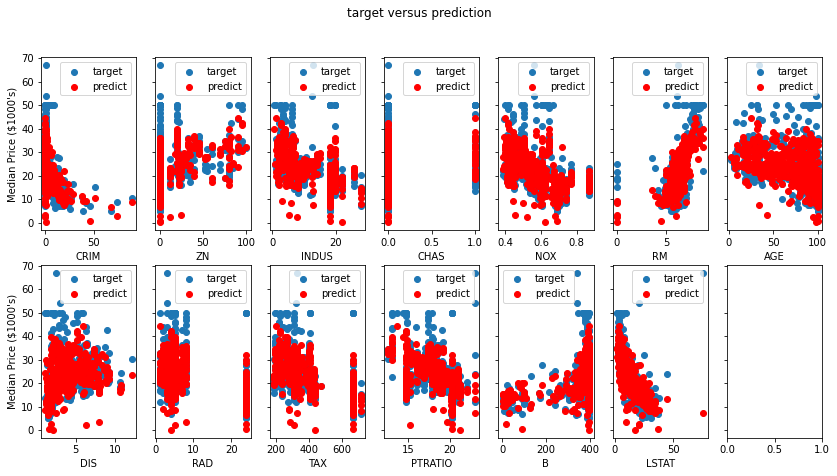

In [51]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(2,7,figsize=(14,7),sharey=True)

for i in range(X_train.shape[1]):
    row = int(i / 7)
    col = int(i % 7)
    ax[row, col].scatter(X_train[:,i],y_train, label = 'target')
    ax[row,col].set_xlabel(X_features[i])
    ax[row,col].scatter(X_train[:,i],y_pred,color='r', label = 'predict')
    ax[row,col].legend();
ax[0,0].set_ylabel("Median Price ($1000's)"); 
ax[1,0].set_ylabel("Median Price ($1000's)");
fig.suptitle("target versus prediction")
plt.show()

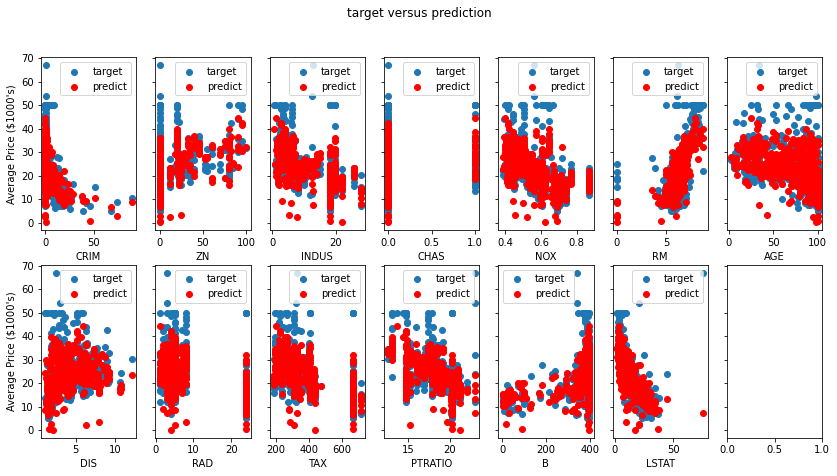

In [11]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(2,7,figsize=(14,7),sharey=True)

for i in range(X_train.shape[1]):
    row = int(i / 7)
    col = int(i % 7)
    ax[row, col].scatter(X_train[:,i],y_train, label = 'target')
    ax[row,col].set_xlabel(X_features[i])
    ax[row,col].scatter(X_train[:,i],y_pred,color='r', label = 'predict')
    ax[row,col].legend();
ax[0,0].set_ylabel("Average Price ($1000's)"); 
ax[1,0].set_ylabel("Average Price ($1000's)");
fig.suptitle("target versus prediction")
plt.show()

1. The objective is to predict the value of prices of the house using the given features. The model thouhg designed to predict the price of houses in surburb Boston, can also be used to predict prices in other cities.

2. Models like this can save time on anylysing data and information to make predictions and can potentially save companies some money excample of such is employing fewer people to do the job, getting quick results in which helps in making a business decision on time.

3. Risk associated with the model is that it's not 100% accurate. Wrong prediction can lead to a bad business decision.
